# Regression

### Load & prepare

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score 

In [2]:
test_data = pd.read_csv('test_regression.csv')
train_data = pd.read_csv('train_regression.csv')
train_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.895930,0.809690,0.87827,0.648120,0.47133,0.51050,0.40881,0.76693,0.21575,0.444950,5.98650
1,0.531930,0.078743,0.66625,0.388230,0.62899,0.53515,0.30681,0.89700,0.42708,0.020121,0.22522
2,0.028085,0.012064,0.85262,0.554250,0.21705,0.83138,0.12825,0.13270,0.94282,0.395840,2.18020
3,0.026921,0.377510,0.18617,0.047276,0.92279,0.63676,0.63542,0.15857,0.32636,0.178870,0.79505
4,0.122340,0.060263,0.38617,0.949250,0.65405,0.10899,0.41123,0.16765,0.70665,0.288850,2.40700


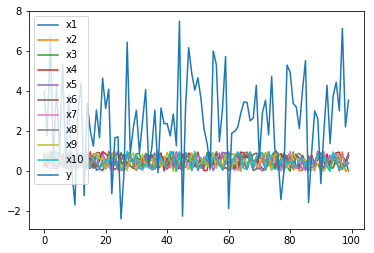

In [3]:
test_data.plot()

In [4]:
train_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.515146,0.505233,0.509313,0.492319,0.487726,0.501549,0.496646,0.504884,0.499203,0.505763,3.033855
std,0.281750,0.287552,0.283724,0.296594,0.277510,0.289872,0.284048,0.283490,0.294294,0.288823,2.056958
min,0.000623,0.000308,0.001716,0.000433,0.001509,0.000230,0.000156,0.000702,0.001085,0.000209,-2.723200
25%,0.281128,0.253653,0.267993,0.231482,0.240800,0.241825,0.265567,0.270148,0.228852,0.250240,1.621025
50%,0.529455,0.509995,0.498600,0.494690,0.498615,0.514560,0.479840,0.501400,0.508350,0.507945,3.075300
75%,0.748045,0.766587,0.762075,0.743455,0.726045,0.753465,0.743783,0.752630,0.748112,0.758768,4.410675
max,0.998740,0.999330,0.999800,0.999290,0.998460,0.999260,0.999550,0.999820,0.999210,0.999880,10.077000


In [5]:
X_train, y_train = train_data[train_data.columns.tolist()[:10]].values, train_data['y'].values
X_test, y_test = test_data[test_data.columns.tolist()[:10]].values, test_data['y'].values

### Model implementation (simple linear regression)

In [6]:
def predict_linear(theta, X):
    # =============== TODO: Your code here ===============
    # Compute the hypothesis function for linear regression.
    return np.dot(X, theta)
    # ====================================================

In [7]:
def cost_function(theta, X, y,reg_type=None, lmbd=None):
    # =============== TODO: Your code here ===============
    # Given the currently learned model weights (theta),
    # compute the overall loss on the training set (X),
    # taking the weights into account.
    L = np.sum(np.square(predict_linear(theta, X) - y)) / (2 * len(y))
    
    if reg_type == 'l2':
        L+=lmbd*np.sum([th**2 for th in theta])
    elif reg_type == 'l1':
        L+=lmbd*np.sum([abs(th) for th in theta])
    return L
# ====================================================

In [8]:
def cost_function_gradient(theta, X, y, reg_type=None, lmbd=None):
    # =============== TODO: Your code here ===============
    # Given the currently learned model weights (theta),
    # compute the gradient of the cost function on the
    # training set (X), taking the weights into account.
    gr = ((predict_linear(theta, X)-y)).dot(X) / X.shape[0]
    
    if reg_type == 'l2':
        gr+=lmbd*2*theta
    elif reg_type == 'l1':
        gr+=lmbd
    
    return gr
    # ====================================================

In [9]:
def update_model_weights(theta, learning_rate, cost_gradient):
    # =============== TODO: Your code here ===============
    # Given the learning rate and the gradient of the
    # cost function, take one gradient descent step and
    # return the updated vector theta.
    
    return theta - learning_rate * cost_gradient
    # ====================================================

### Train & compare results

In [10]:
def gradient_descent(X, y, loss_fun, grad_fun, learning_rate, convergence_threshold, max_iters, verbose=False, reg_type=None, lmbd=None):
    theta = np.zeros(X.shape[1])
    losses = []
    
    for i in range(max_iters):
        loss = loss_fun(theta, X, y, reg_type=reg_type,lmbd=lmbd)
        losses.append(loss)
        
        if verbose:
            print("Iteration: {0:3} Loss: {1}".format(i + 1, loss))

        if len(losses) > 2 and np.abs(losses[-1] - losses[-2]) <= convergence_threshold:
            break
        
        grad = grad_fun(theta, X, y, reg_type=reg_type,lmbd=lmbd)
        theta = update_model_weights(theta, learning_rate, grad)
        
    return theta, np.array(losses)

In [11]:
def predict_linear_regression(X_train, y_train, X_test, verbose=False, reg_type=None, lmbd=None):
    theta, losses = gradient_descent(
        X_train,
        y_train,
        loss_fun=cost_function,
        grad_fun=cost_function_gradient,
        learning_rate=0.005,
        convergence_threshold=0.0001,
        max_iters=500,
        verbose=verbose,
        reg_type=reg_type,
        lmbd=lmbd
    )
    pred = [predict_linear(theta, x_pred) for x_pred in X_test]
    return np.array(pred)

#### __my model__

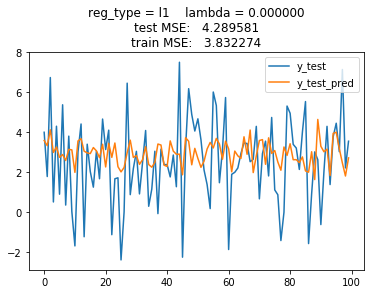

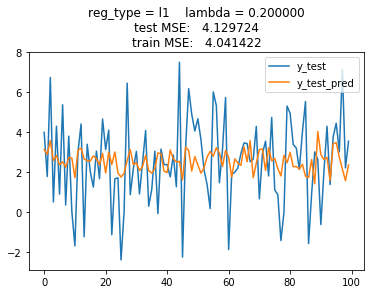

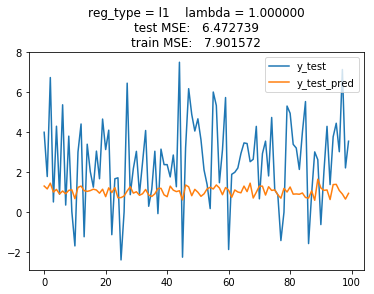

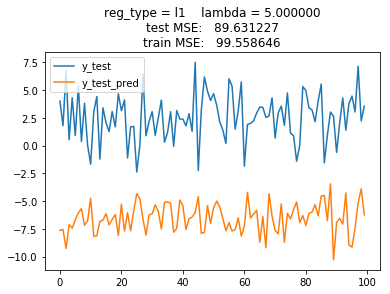

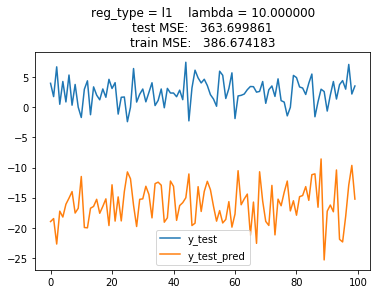

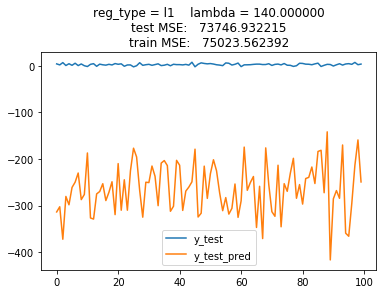

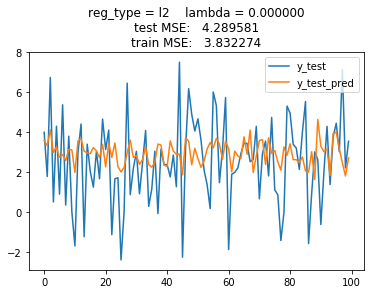

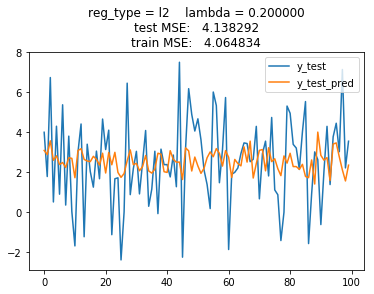

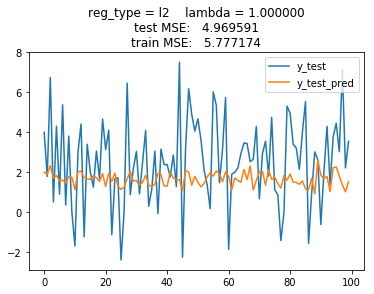

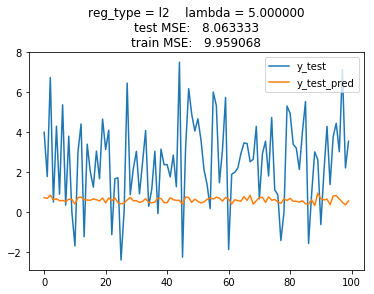

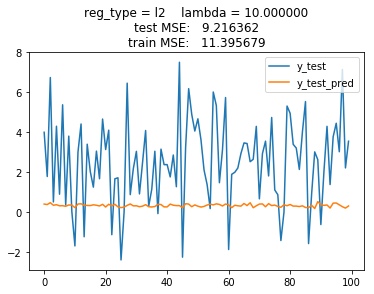

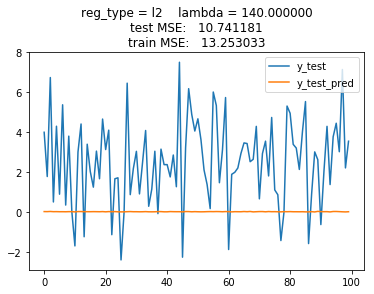

In [12]:
for reg_type in ['l1', 'l2']:
    for lmbd in [0, 0.2, 1, 5, 10, 140]: 
        y_train_pred = predict_linear_regression(X_train, y_train, X_train, reg_type=reg_type, lmbd=lmbd)
        y_test_pred = predict_linear_regression(X_train, y_train, X_test, reg_type=reg_type, lmbd=lmbd)
        title = 'reg_type = %s    lambda = %f' % (reg_type,lmbd)
        title += '\ntest MSE:   %f' % mean_squared_error(y_test, y_test_pred)
        title += '\ntrain MSE:   %f' % mean_squared_error(y_train, y_train_pred)
        pd.DataFrame(data = {'y_test': y_test, 'y_test_pred': y_test_pred}).plot(title=title)        

#### __sklearn's model__

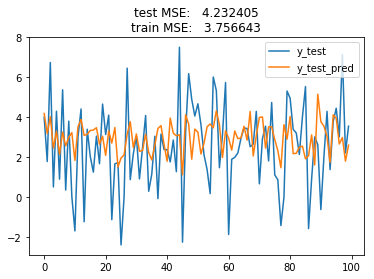

In [14]:
lr = LinearRegression().fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
title = 'test MSE:   %f' % mean_squared_error(y_test, y_test_pred)
title += '\ntrain MSE:   %f' % mean_squared_error(y_train, y_train_pred)
pd.DataFrame(data={'y_test':y_test, 'y_test_pred':y_test_pred}).plot(title=title)

Again, our model seems to perform better without regularization, obviously because it underfits and has low variance, and with regularization we decrease our variance even more.

Theoretically if our model overfitted and we used regularizaion, l1 would be better for us, as it has feature selection in it, which is not bad for 10 features.

### Models evaluation

#### __CV & evaluation__

I already know which model is the best from plots above, but for the task I will use Kfold CV.

In [15]:
kf = KFold(n_splits=15, shuffle=True)

In [16]:
accs = {'MSE':[],
        'RMSE':[],
        'MAE':[],
        'R^2':[],
        'adjusted R^2':[]
       }
for train_ind, test_ind in kf.split(X_train, y_train):
    
    pred = predict_linear_regression(X_train[train_ind], y_train[train_ind], X_train[test_ind])  
    accs['MSE'].append(mean_squared_error(y_train[test_ind], pred))
    accs['RMSE'].append(np.sqrt(accs['MSE'][-1]))
    accs['MAE'].append(mean_absolute_error(y_train[test_ind], pred))
    accs['R^2'].append(r2_score(y_train[test_ind], pred))
    n = len(train_ind)
    accs['adjusted R^2'].append(1-(1-accs['R^2'][-1])*(n-1)/(n-10-1))
    
for key in accs.keys():
    accs[key] = np.mean(accs[key])
accs

{'MSE': 3.845538246624431,
 'RMSE': 1.953670137121739,
 'MAE': 1.5658145054677177,
 'R^2': 0.0814936874432395,
 'adjusted R^2': 0.07153511360962274}

* MSE - sum of distances between predicted and real datapoints
* RMSE - square root of MSE, gives understanding of error magnitude
* MAE - average vertical distance between each point and the x=y line

MSE, RMSE, MAE - metrics that differently measure distance between predicted and real datapoints.

* R^2 - Explained variation / Total variation
* adjusted R^2 - R^2 increases with number of features, so they came up with adjusted R^2 to have better metrics.